This is a program to analyse multiple recordings of the maximum acceleration of an ETH MIKE.

In [1]:
# import
from nptdms import TdmsFile # https://nptdms.readthedocs.io/en/stable/
from matplotlib import pyplot as plt
import numpy as np
%matplotlib widget

In [2]:
# read in the tdms files
file = TdmsFile.read("tdms_files/"+"Mike6_maxAcc_1.tdms")

In [3]:
# extract position and time signals
position = file["maxAcc"]["Position [deg]"][:]
time = file["maxAcc"]["Time (ms)"][:]

In [4]:
# calculate position steps and time steps
pos_steps = []
time_steps = []
for j in range(1,len(position)):
    pos_steps.append(position[j]-position[j-1])

for j in range(1,len(time)):
    diff = time[j]-time[j-1]
    if diff == 0:
        diff = 0.001
    time_steps.append(diff*0.001) #convert to seconds

In [5]:
# find range in which position is changing
for j in range(0,len(pos_steps)):
    if pos_steps[j] != 0:
        start_index=j
        break
print("start_index =", start_index)
for i in range(start_index,len(pos_steps)):
    if pos_steps[i] == 0:
        end_index = i
        break
print("end_index =", end_index)

start_index = 913
end_index = 1148


In [6]:
# plotting
# create nice time vector
plt_time = []
plt_time.append(0)
for j in range(start_index ,end_index):
    plt_time.append(plt_time[j-start_index]+time_steps[j])

In [7]:
# create position polyfit
deg = 18
plt_pos = position[start_index:end_index+1]
pos_poly = np.polyfit(plt_time, plt_pos, deg)
pos_est = []
for i in range(0, len(plt_time)):
    pos = 0
    for e in range(0,deg+1):
        pos += pos_poly[e]*plt_time[i]**(deg-e)
    pos_est.append(pos)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
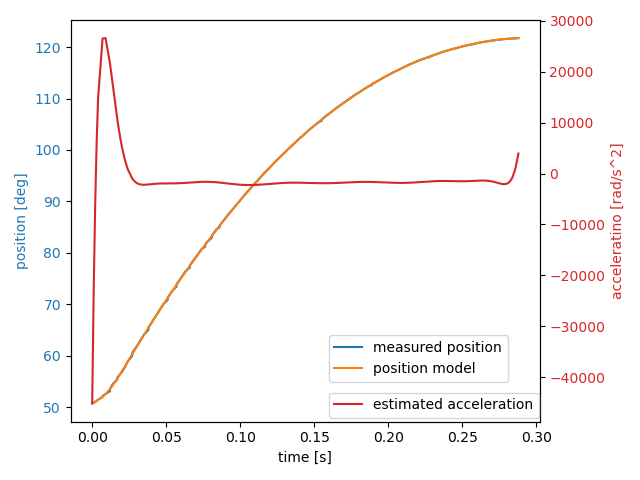

The maximum acceleration is:  26563.613105625067
The minimum acceleration is:  -45105.6850204186


In [8]:
# calculate acceleration (deviation of polynomial function)
plt.close(1)
vel_poly = np.zeros(deg)
for i in range(0,deg):
    vel_poly[i] = pos_poly[i]*(deg-i)
acc_poly = np.zeros(deg-1)
for i in range(0,deg-1):
    acc_poly[i] = vel_poly[i]*(deg-i-1)
    
acc_plot = []
for i in range(0, len(plt_time)):
    acc = 0
    for e in range(0,deg-1):
        acc += acc_poly[e]*plt_time[i]**(deg-e-2)
    acc_plot.append(acc)

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel("time [s]")
ax1.set_ylabel("position [deg]", color = color)
ax1.plot(plt_time, plt_pos ,label="measured position")
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(plt_time, pos_est, label="position model")
plt.legend(loc=(0.55,0.1))

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("acceleratino [rad/s^2]", color=color)
ax2.plot(plt_time, acc_plot, color=color, label="estimated acceleration")
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(loc=(0.55,0.01))

fig.tight_layout()
plt.savefig("max_Acceleration_example.pdf")
plt.show()

print("The maximum acceleration is: ", max(acc_plot))
print("The minimum acceleration is: ", min(acc_plot))